In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('relies_final.csv', encoding='utf-8-sig')
data = data[data['answer'] == 0]
data = data[data['text'].apply(lambda x: isinstance(x, str))]

In [17]:
data = data[:10000]

In [4]:
!pip install transformers

  Using cached safetensors-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 22.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 20.0 MB/s eta 0:00:00
Using cached safetensors-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (435 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [18]:
from transformers import pipeline
from tqdm import tqdm

# 감정 분석 파이프라인 초기화 (예시: 한국어 지원 모델)
sentiment_analysis = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Ensure truncation
sentiments = []
for text in tqdm(data['text'], desc="Processing"):
    try:
        result = sentiment_analysis(text, truncation=True, max_length=512)[0]['label']
        sentiments.append(result)
    except Exception as e:
        print(f"Error processing text: {text[:50]}... - {e}")
        sentiments.append(None)  # Optionally, append None for errored rows

data['sentiment'] = sentiments
data.to_csv('sentiment1.csv', encoding='utf-8-sig', index=False)

Processing:  37%|███▋      | 3689/10000 [09:24<16:06,  6.53it/s]  


KeyboardInterrupt: 

In [18]:
sentiment1 = pd.read_csv('sentiment1.csv', encoding='utf-8-sig')
sentiment2 = pd.read_csv('sentiment2.csv', encoding='utf-8-sig')
sentiment3 = pd.read_csv('sentiment3.csv', encoding='utf-8-sig')
sentiment4 = pd.read_csv('sentiment4.csv', encoding='utf-8-sig')

In [19]:
sentiment = pd.concat([sentiment1, sentiment2, sentiment3, sentiment4]).reset_index(drop=True)

In [20]:
sentiment

,user_id,id,time,answer,text,sentiment
0,dlsndi4,dlsndi4,2024-11-24T00:02:25.000Z,0,꺅 스친이 댓글에 심쿵😍,3 stars
1,dlsndi4,dlsndi4,2024-11-23T07:19:04.000Z,0,저 이제 뒤에 1주년이에요 ㅎㅎ,1 star
2,dlsndi4,dlsndi4,2024-11-23T01:35:38.000Z,0,걱정했는데 실제 후기 있으니 좋네요 ㅎㅎ 저도 너무 싸서 걱정하다가 했는데 \n기대...,3 stars
3,dlsndi4,dlsndi4,2024-11-22T11:26:24.000Z,0,저도 두통 때문에 정신과 갔다가 adhd 진단 받았는데 신기해요!!,1 star
4,dlsndi4,dlsndi4,2024-11-21T11:07:19.000Z,0,ADHD이라 도파민이 부족해서요 ㅋㅋ ㅠ,2 stars
...,...,...,...,...,...,...
45929,na__bi.s,na__bi.s,2024-07-19T01:04:39.000Z,0,오 그런가요??,1 star
45930,na__bi.s,na__bi.s,2024-07-19T01:04:31.000Z,0,감사합니다 ㅎㅎ,5 stars
45931,na__bi.s,na__bi.s,2024-07-19T00:06:27.000Z,0,감사합니다!!,5 stars
45932,na__bi.s,na__bi.s,2024-07-19T00:06:20.000Z,0,장미랑 작은 나비붙어있는 타투요!,5 stars


In [21]:
sentiment['sentiment'] = sentiment['sentiment'].str.replace(" stars", "", regex=False)
sentiment['sentiment'] = sentiment['sentiment'].str.replace(" star", "", regex=False)
sentiment['sentiment'] = sentiment['sentiment'].astype(int)
sentiment.to_csv('sentiment_self.csv', encoding='utf-8-sig', index=False)

In [30]:
pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 10.2 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 9.7 MB/s eta 0:00:00a 0:00:01m
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 15.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


sentiment
1    14687
2     7270
3    10037
4     2052
5    11888
Name: count, dtype: int64


/tmp/ipykernel_9071/1057435243.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


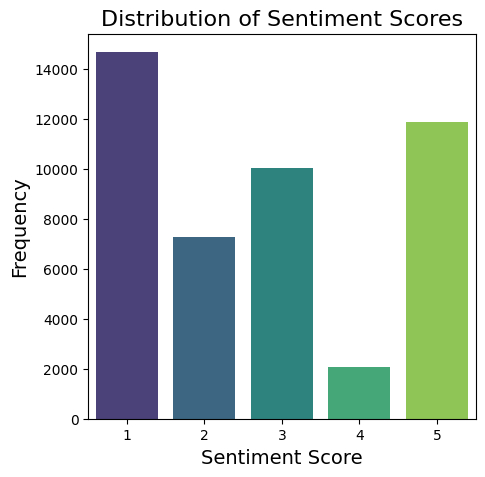

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment = pd.read_csv('sentiment_self.csv', encoding='utf-8-sig')

# sentiment 컬럼 값 분포 계산
sentiment_counts = sentiment['sentiment'].value_counts().sort_index()

# 분포 출력
print(sentiment_counts)

# 시각화 (막대 그래프)
plt.figure(figsize=(5, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiment Scores", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [6]:
%pip install wordcloud matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 16.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 20.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
positive = sentiment[sentiment['answer'] == 4 | sentiment['answer'] == 5]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

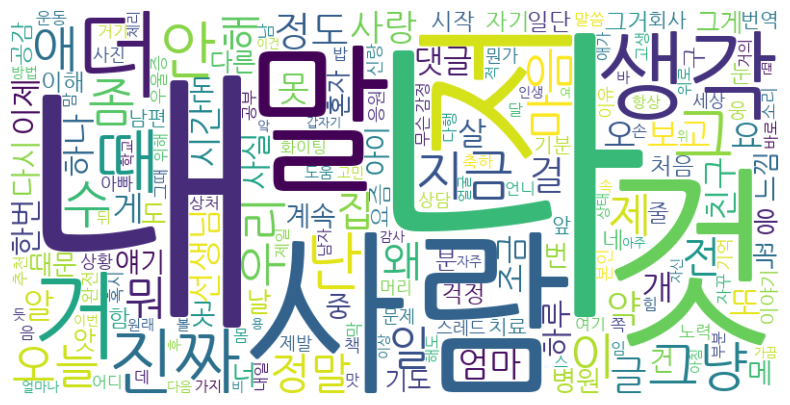

In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter

# 데이터프레임 생성 예시 (이미 데이터프레임이 있을 경우 생략 가능)
# df = pd.read_csv('your_file.csv')

# df['text'] 열을 하나의 문자열로 결합
text = ' '.join(sentiment['text'].dropna().astype(str))

# 한글 형태소 분석기를 사용하여 명사 추출
okt = Okt()
nouns = okt.nouns(text)

# 명사 빈도수 계산
count = Counter(nouns)

# 워드클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                      width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(count)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

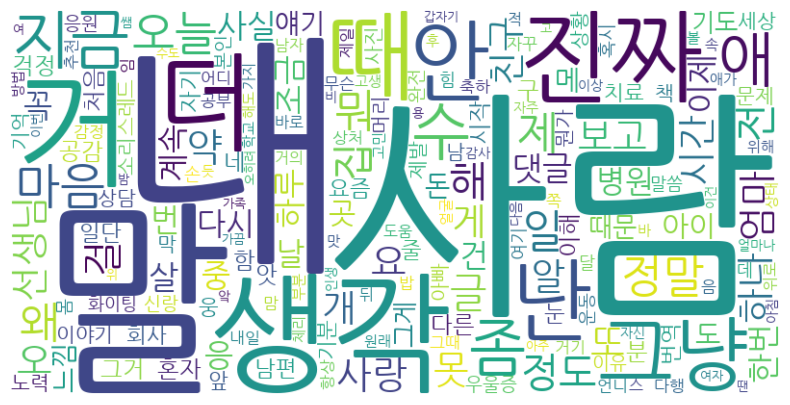

In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter

# 데이터프레임 생성 예시 (이미 데이터프레임이 있을 경우 생략 가능)
# df = pd.read_csv('your_file.csv')

# df['text'] 열을 하나의 문자열로 결합
text = ' '.join(sentiment['text'].dropna().astype(str))

# 한글 형태소 분석기를 사용하여 명사 추출
okt = Okt()
nouns = [noun for noun in okt.nouns(text) if noun not in ['나', '너', '우리', '저', '그', '이', '것']]  # 대명사 제거

# 명사 빈도수 계산
count = Counter(nouns)

# 워드클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                      width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(count)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

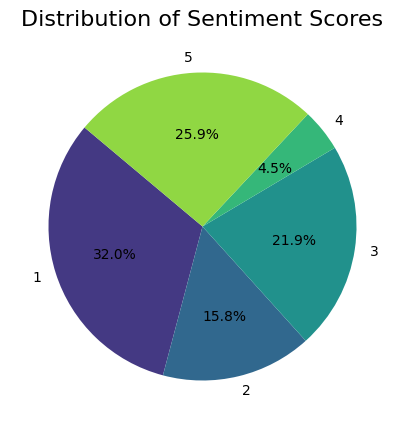

In [5]:
# 파이 차트 시각화
plt.figure(figsize=(5, 5))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("viridis", len(sentiment_counts))
)
plt.title("Distribution of Sentiment Scores", fontsize=16)
plt.show()

In [39]:
sentiment

,user_id,id,time,answer,text,sentiment
0,dlsndi4,dlsndi4,2024-11-24T00:02:25.000Z,0,꺅 스친이 댓글에 심쿵😍,3
1,dlsndi4,dlsndi4,2024-11-23T07:19:04.000Z,0,저 이제 뒤에 1주년이에요 ㅎㅎ,1
2,dlsndi4,dlsndi4,2024-11-23T01:35:38.000Z,0,걱정했는데 실제 후기 있으니 좋네요 ㅎㅎ 저도 너무 싸서 걱정하다가 했는데 \n기대...,3
3,dlsndi4,dlsndi4,2024-11-22T11:26:24.000Z,0,저도 두통 때문에 정신과 갔다가 adhd 진단 받았는데 신기해요!!,1
4,dlsndi4,dlsndi4,2024-11-21T11:07:19.000Z,0,ADHD이라 도파민이 부족해서요 ㅋㅋ ㅠ,2
...,...,...,...,...,...,...
45929,na__bi.s,na__bi.s,2024-07-19T01:04:39.000Z,0,오 그런가요??,1
45930,na__bi.s,na__bi.s,2024-07-19T01:04:31.000Z,0,감사합니다 ㅎㅎ,5
45931,na__bi.s,na__bi.s,2024-07-19T00:06:27.000Z,0,감사합니다!!,5
45932,na__bi.s,na__bi.s,2024-07-19T00:06:20.000Z,0,장미랑 작은 나비붙어있는 타투요!,5


In [40]:
# 토큰 수 기준 설정 (예: 5개 이상)
token_threshold = 3

# 토큰 수 계산 및 필터링
sentiment['token_count'] = sentiment['text'].apply(lambda x: len(x.split()))
df = sentiment[sentiment['token_count'] >= token_threshold]

In [42]:
df

,user_id,id,time,answer,text,sentiment,token_count
0,dlsndi4,dlsndi4,2024-11-24T00:02:25.000Z,0,꺅 스친이 댓글에 심쿵😍,3,4
1,dlsndi4,dlsndi4,2024-11-23T07:19:04.000Z,0,저 이제 뒤에 1주년이에요 ㅎㅎ,1,5
2,dlsndi4,dlsndi4,2024-11-23T01:35:38.000Z,0,걱정했는데 실제 후기 있으니 좋네요 ㅎㅎ 저도 너무 싸서 걱정하다가 했는데 \n기대...,3,13
3,dlsndi4,dlsndi4,2024-11-22T11:26:24.000Z,0,저도 두통 때문에 정신과 갔다가 adhd 진단 받았는데 신기해요!!,1,9
4,dlsndi4,dlsndi4,2024-11-21T11:07:19.000Z,0,ADHD이라 도파민이 부족해서요 ㅋㅋ ㅠ,2,5
...,...,...,...,...,...,...,...
45921,na__bi.s,na__bi.s,2024-07-19T04:41:10.000Z,0,헉 서버가 어디신쥐..!! 🥹,1,4
45922,na__bi.s,na__bi.s,2024-07-19T04:40:40.000Z,0,아쉽지만 제가 서든은 안해봐씀다 훠훠,2,5
45924,na__bi.s,na__bi.s,2024-07-19T04:24:19.000Z,0,꺅 미소녀한테 이런 칭찬을 !! 감사해여 🥹❤️,1,7
45926,na__bi.s,na__bi.s,2024-07-19T01:06:12.000Z,0,엇 저도 포치타 있는디,1,4


sentiment
1    11257
2     6697
3     7066
4     1475
5     6063
Name: count, dtype: int64


/tmp/ipykernel_59016/2072098509.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


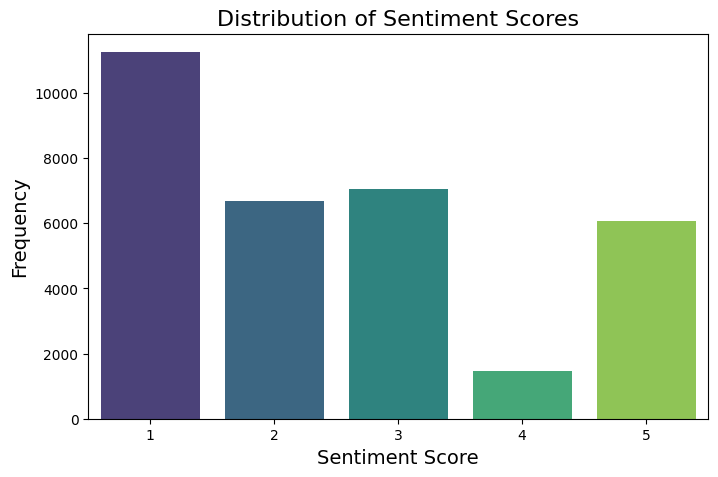

: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# sentiment 컬럼 값 분포 계산
sentiment_counts = df['sentiment'].value_counts().sort_index()

# 분포 출력
print(sentiment_counts)

# 시각화 (막대 그래프)
plt.figure(figsize=(5, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiment Scores", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [4]:
data = pd.read_csv('relies_final.csv', encoding='utf-8-sig')
data = data[data['answer'] == 1]
data = data[data['text'].apply(lambda x: isinstance(x, str))].reset_index(drop=True)
data

,user_id,id,time,answer,text
0,dlsndi4,__jehii__,2024-11-23T14:02:12.000Z,1,프사에서도 알콩이 느껴짐 너무 이쁘오☺️
1,dlsndi4,un_livingboy,2024-11-16T13:20:39.000Z,1,タッカンマリ 이거 일본인에게 처음 들음🤦‍♂️
2,dlsndi4,youandi_marriageagency,2024-11-16T12:58:16.000Z,1,매울때 치즈 올리면 중화된다고 생각하는데 그냥 치즈 맛으로 먹는거 같기도 하고..\...
3,dlsndi4,aviatrip,2024-11-16T12:40:50.000Z,1,저는 치즈닭갈비 먹어본 적이 없네요
4,dlsndi4,mitsuno.love.kyoungmi,2024-11-16T12:43:34.000Z,1,저도 닭갈비를 먹으면 그냥 닭갈비를먹지 치즈토핑은하지않아요ㅋㅋㅋ
...,...,...,...,...,...
22160,na__bi.s,_0921_jin,2024-07-19T04:41:24.000Z,1,카제로스에요 ...! 히히
22161,na__bi.s,kimoneju,2024-07-19T00:46:16.000Z,1,진정한 야행성인간..
22162,na__bi.s,kfa1015,2024-07-19T00:40:49.000Z,1,🥰😍🤩
22163,na__bi.s,otterboi_fxx,2024-07-19T00:45:15.000Z,1,긴머리도


In [5]:
from transformers import pipeline
from tqdm import tqdm

# 감정 분석 파이프라인 초기화 (예시: 한국어 지원 모델)
sentiment_analysis = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Ensure truncation
sentiments = []
for text in tqdm(data['text'], desc="Processing"):
    try:
        result = sentiment_analysis(text, truncation=True, max_length=512)[0]['label']
        sentiments.append(result)
    except Exception as e:
        print(f"Error processing text: {text[:50]}... - {e}")
        sentiments.append(None)  # Optionally, append None for errored rows

data['sentiment'] = sentiments
data.to_csv('sentiment_re.csv', encoding='utf-8-sig', index=False)

/home/kyuseok00/.pyenv/versions/dartb/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Processing: 100%|██████████| 22165/22165 [51:42<00:00,  7.15it/s]  


In [7]:
# 토큰 수 기준 설정 (예: 5개 이상)
token_threshold = 3

# 토큰 수 계산 및 필터링
data['token_count'] = data['text'].apply(lambda x: len(x.split()))
df_re = data[data['token_count'] >= token_threshold]

In [36]:
d2 = pd.read_csv('relies_final.csv', encoding='utf-8-sig')
d2 = d2[d2['answer'] == 2]
d2 = d2[d2['text'].apply(lambda x: isinstance(x, str))]
d2

,user_id,id,time,answer,text
2,dlsndi4,__jehii__,2024-11-23T05:13:52.000Z,2,오늘 결혼기념일이야 \n11년 전일이 되어버림... 일본에서 결혼한 사람 모여봐 \...
4,dlsndi4,si_ru._.19,2024-11-22T04:25:27.000Z,2,"결혼식 한달차라 아직 사진은 다 못받았는데 ,\n나 DVD+서브스냅 28만원에 했다..."
6,dlsndi4,pyeonghwa.a,2024-11-22T00:35:49.000Z,2,ADHD 검사를 받게 된 이유는\n편두통때문이었는데\n콘서타 약을 먹은 순간 이마가...
8,dlsndi4,totokoko991,2024-11-20T15:35:18.000Z,2,제일 이해 안가는 부류\n샤워하는데 폰 한다? 물튀기는데 굳이 폰만지고..\n빨리 ...
10,dlsndi4,ifs_life,2024-11-21T00:21:05.000Z,2,청개구리 남편 길들이는 비법 공개 1/2 내 남편이 아는 한국어 단어 중 하나가 ‘...
...,...,...,...,...,...
84692,na__bi.s,_0921_jin,2024-07-19T04:40:01.000Z,2,로아 .... 로아 ........!
84694,na__bi.s,kdh.__.95,2024-07-19T04:29:27.000Z,2,서든도 껴줘..
84696,na__bi.s,pjy3421,2024-07-19T04:32:57.000Z,2,모델이내 예쁘다
84700,na__bi.s,otterboi_fxx,2024-07-18T10:28:21.000Z,2,포치타 입양보냈다.. 잘 살아라🥲


In [41]:
from transformers import pipeline
from tqdm import tqdm

# 감정 분석 파이프라인 초기화 (예시: 한국어 지원 모델)
sentiment_analysis = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Ensure truncation
sentiments = []
for text in tqdm(d2['text'], desc="Processing"):
    try:
        result = sentiment_analysis(text, truncation=True, max_length=512)[0]['label']
        sentiments.append(result)
    except Exception as e:
        print(f"Error processing text: {text[:50]}... - {e}")
        sentiments.append(None)  # Optionally, append None for errored rows

d2['sentiment'] = sentiments
d2.to_csv('sentiment_d2.csv', encoding='utf-8-sig', index=False)

Processing: 100%|██████████| 16218/16218 [54:27<00:00,  4.96it/s] 


In [40]:
df = pd.read_csv('relies_final.csv', encoding='utf-8-sig')
df

,user_id,id,time,answer,text
0,dlsndi4,__jehii__,2024-11-23T14:02:12.000Z,1,프사에서도 알콩이 느껴짐 너무 이쁘오☺️
1,dlsndi4,dlsndi4,2024-11-24T00:02:25.000Z,0,꺅 스친이 댓글에 심쿵😍
2,dlsndi4,__jehii__,2024-11-23T05:13:52.000Z,2,오늘 결혼기념일이야 \n11년 전일이 되어버림... 일본에서 결혼한 사람 모여봐 \...
3,dlsndi4,dlsndi4,2024-11-23T07:19:04.000Z,0,저 이제 뒤에 1주년이에요 ㅎㅎ
4,dlsndi4,si_ru._.19,2024-11-22T04:25:27.000Z,2,"결혼식 한달차라 아직 사진은 다 못받았는데 ,\n나 DVD+서브스냅 28만원에 했다..."
...,...,...,...,...,...
84709,na__bi.s,na__bi.s,2024-07-19T01:04:31.000Z,0,감사합니다 ㅎㅎ
84710,na__bi.s,sho_inoue33,2024-07-18T18:48:42.000Z,2,아주 귀엽네요♪
84711,na__bi.s,na__bi.s,2024-07-19T00:06:27.000Z,0,감사합니다!!
84712,na__bi.s,na__bi.s,2024-07-19T00:06:20.000Z,0,장미랑 작은 나비붙어있는 타투요!


sentiment
1 star     6612
2 stars    3955
3 stars    2457
4 stars     823
5 stars    2371
Name: count, dtype: int64


/tmp/ipykernel_152887/1020342813.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


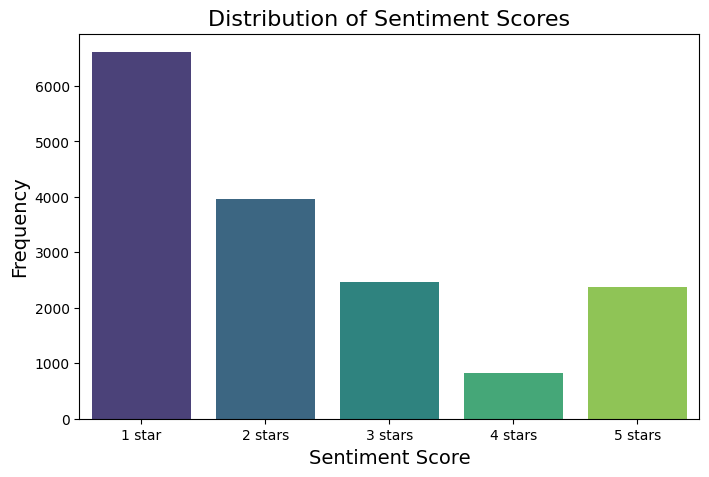

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# sentiment 컬럼 값 분포 계산
sentiment_counts = d2['sentiment'].value_counts().sort_index()

# 분포 출력
print(sentiment_counts)

# 시각화 (막대 그래프)
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiment Scores", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [45]:
data = pd.read_csv('sentiment_self.csv', encoding='utf-8-sig')

In [51]:
user_mean = pd.DataFrame(data.groupby('user_id')['sentiment'].mean())

In [59]:
user_stats

,user_id,row_count,sentiment_mean
0,19.lifelife__,52,4.365385
1,3.92km_simri,4,2.500000
2,__shine.brightly,272,3.422794
3,_puum_kinn_,4,1.500000
4,alway_7084,1225,2.462041
...,...,...,...
90,yeongyeong_design,979,2.449438
91,yiseo_ashenisland_,2574,2.830614
92,yozoh_k,148,2.324324
93,yuzyamong,127,2.685039


상관계수: -0.08


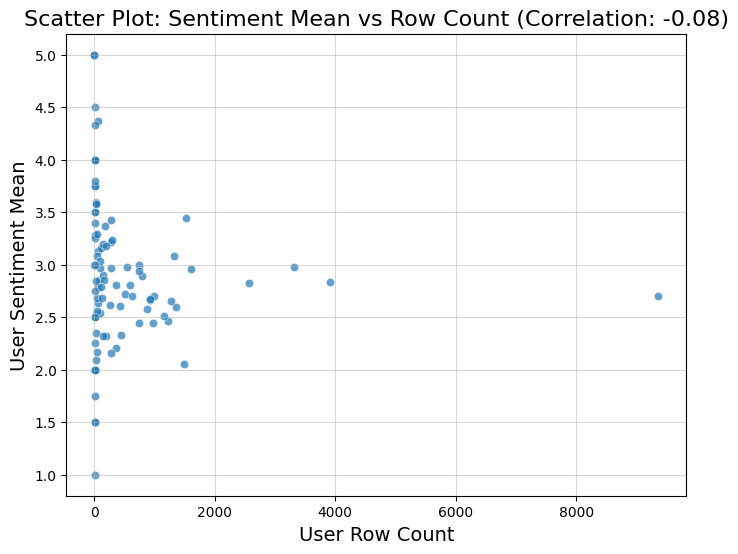

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 예시 로드 (이미 data라는 DataFrame이 있다고 가정)
# user_id별 row count와 sentiment mean 계산
user_stats = data.groupby('user_id').agg(
    row_count=('user_id', 'size'),   # user_id별 row 개수
    sentiment_mean=('sentiment', 'mean')  # user_id별 sentiment 평균
).reset_index()

# 상관계수 계산
correlation = user_stats['row_count'].corr(user_stats['sentiment_mean'])
print(f"상관계수: {correlation:.2f}")

# 시각화 (산점도)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='row_count', y='sentiment_mean', data=user_stats, alpha=0.7)
plt.title(f"Scatter Plot: Sentiment Mean vs Row Count (Correlation: {correlation:.2f})", fontsize=16)
plt.xlabel("User Row Count", fontsize=14)
plt.ylabel("User Sentiment Mean", fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()


In [52]:
user_mean

,sentiment
user_id,
19.lifelife__,4.365385
3.92km_simri,2.500000
__shine.brightly,3.422794
_puum_kinn_,1.500000
alway_7084,2.462041
...,...
yeongyeong_design,2.449438
yiseo_ashenisland_,2.830614
yozoh_k,2.324324


## 단어 긍부정 

In [12]:
import pandas as pd

df = pd.read_csv('mat.csv', encoding='utf-8-sig')
df

,_id,user_id,time,url,text,text_result
0,67430fbc0c898a183d4f9641,gh0422,2024-05-26T07:25:18.000Z,https://www.threads.net/@gh0422/post/C7bFgLsyDqq,"읽씹,안읽씹내가 눈치가 없는걸까? 바로 전 카톡까지만 해도 나를 걱정하는 말.혹은 ...","읽씹, 안읽씹 내가 눈치가 없는 걸까? 바로 전 카톡까지만 해도 나를 걱정하는 말...."
1,67430fbc0c898a183d4f9643,gh0422,2024-05-25T16:55:54.000Z,https://www.threads.net/@gh0422/post/C7ZiAb0y7QS,남 탓으로 돌리는게 아니야.난 이해받지 못하는 인간이지만간절히 이해받고 싶던 인간이...,남 탓으로 돌리는 게 아니야. 난 이해받지 못하는 인간이지만 간절히 이해받고 싶던 ...
2,67430fbc0c898a183d4f9649,gh0422,2024-05-24T20:14:00.000Z,https://www.threads.net/@gh0422/post/C7XT4h1ScCA,오늘은 나쁜꿈 슬픈꿈 안꾸게 해주세요🙏한번 크게 힘든 꿈 꾸고나면 안그래도 잘 못자...,오늘은 나쁜 꿈 슬픈 꿈 안 꾸게 해주세요 🙏 한 번 크게 힘든 꿈 꾸고 나면 안 ...
3,67430fbc0c898a183d4f964c,gh0422,2024-05-24T13:31:24.000Z,https://www.threads.net/@gh0422/post/C7Wlzzcykh0,과연 나는 누군가가 감싸줄만한 사람일까?누구나 절대 선으로만 인생을 살아오지는 않았...,과연 나는 누군가가 감싸줄 만한 사람일까? 누구나 절대 선으로만 인생을 살아오지는 ...
4,67430fbc0c898a183d4f964d,gh0422,2024-05-24T12:20:17.000Z,https://www.threads.net/@gh0422/post/C7Wdq7SyBrv,온 몸으로 우울함이 쏟아지는 오늘.학원에서도 말 하기가 싫어서 이어폰 끼고계속 내 ...,온몸으로 우울함이 쏟아지는 오늘. 학원에서도 말하기가 싫어서 이어폰 끼고 계속 내 ...
...,...,...,...,...,...,...
5417,67430fbc0c898a183d4fec1b,ibfci,2024-02-13T06:00:07.000Z,https://www.threads.net/@ibfci/post/C3Rt4LuRZ7D,걱정하지 말아달라는 거다.다들 그래봤자 어차피 나를 떠날 거니까.나는 사람을 잘 안...,걱정하지 말라는 거다. 다들 그래 봤자 어차피 나를 떠날 거니까. 나는 사람을 잘 ...
5418,67430fbc0c898a183d4fec28,ibfci,2024-02-13T01:27:38.000Z,https://www.threads.net/@ibfci/post/C3ROsXJPp9w,요즘 들어 꿈에서 자꾸 제가 스스로 목숨을 끊는데.. 이거 어어.. 안 좋은 거죠?,요즘 들어 꿈에서 자꾸 제가 스스로 목숨을 끊는데.. 이거 안 좋은 거죠?
5419,67430fbc0c898a183d4fec29,ibfci,2024-02-13T01:28:41.000Z,https://www.threads.net/@ibfci/post/C3RO0GKP_fZ,"몇 주 안에 두 번 꿨어요. 한 번은 바다에 투신, 한 번은 옥상에서..","몇 주 안에 두 번 꿨어요. 한 번은 바다에 투신, 한 번은 옥상에서...."
5420,67430fbc0c898a183d4fec2a,ibfci,2024-02-13T01:24:16.000Z,https://www.threads.net/@ibfci/post/C3ROTz1PCGj,아.. 울다..콘텐츠를 이용할 수 없음,아.. 울다.. 콘텐츠를 이용할 수 없음


In [15]:
%pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 6.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 29.0 MB/s eta 0:00:00
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.20.0-py3-none-any.whl size=34818026 sha256=84344f7b5b8b018b9f43cb50ade50b004fedb2ca3d0f3c3d0d8775524c575772
  Stored in directory: /home/kyuseok00/.cache/pip/wheels/df/b8/b3/e7678db8a728f3b21c6312ccc05cc3d8f5f1eac48801695adf
Successfully built kiwipiepy-model
Note: you may need to restart the kernel to use updated packages.


In [3]:
from kiwipiepy import Kiwi

# Kiwi 객체 생성
kiwi = Kiwi()

# 형태소 분석 후 리스트 형태로 추출하는 함수
def extract_morphemes_list(text):
    if pd.isna(text):  # NaN 값 처리
        return []
    tokens = kiwi.analyze(text)
    morphemes = [word[0] for sentence in tokens for word in sentence[0]]  # 형태소 추출
    return morphemes

# text_result에 대해 형태소 리스트 생성
df["morpheme"] = df["text_result"].apply(extract_morphemes_list)

In [4]:
df['morpheme']

0       [읽씹, ,, 안읽씹, 나, 가, 눈치, 가, 없, 는, 거, 이, ᆯ까, ?, 바...
1       [남, 탓, 으로, 돌리, 는, 것, 이, 아니, 야, ., 나, ᆫ, 이해, 받,...
2       [오늘, 은, 나쁘, ᆫ, 꿈, 슬프, ᆫ, 꿈, 안, 꾸, 게, 하, 어, 주, ...
3       [과연, 나, 는, 누구, 이, ᆫ가, 가, 감싸, 어, 주, ᆯ, 만, 하, ᆫ,...
4       [온몸, 으로, 우울, 하, ᆷ, 이, 쏟아지, 는, 오늘, ., 학원, 에서, 도...
                              ...                        
5417    [걱정, 하, 지, 말, 라는, 거, 이, 다, ., 다, 들, 그렇, 어, 보, ...
5418    [요즘, 들, 어, 꿈, 에서, 자꾸, 저, 가, 스스로, 목숨, 을, 끊, 는데,...
5419    [몇, 주, 안, 에, 두, 번, 꾸, 었, 어요, ., 한, 번, 은, 바다, 에...
5420         [아, .., 울, 다, .., 콘텐츠, 를, 이용, 하, ᆯ, 수, 없, 음]
5421    [네, ,, 안녕, 하, 세요, ., 의사, 선생, 님, 이, 카페인, 먹, 지, ...
Name: morpheme, Length: 5422, dtype: object

In [8]:
unique_morphemes = df['morpheme'].explode().dropna().unique().tolist()
unique_morphemes

['읽씹',
 ',',
 '안읽씹',
 '나',
 '가',
 '눈치',
 '없',
 '는',
 '거',
 '이',
 'ᆯ까',
 '?',
 '바로',
 '전',
 '카톡',
 '까지',
 '만',
 '하',
 '어도',
 '를',
 '걱정',
 '말',
 '.',
 '혹은',
 '질문',
 '을',
 '건네',
 '어',
 '놓',
 '고',
 '그',
 '에',
 '답',
 '면',
 '씹히',
 '경우',
 '있',
 '었',
 '다',
 '함께',
 '즐겁',
 '게',
 '웃',
 '놀',
 '떠들',
 '때로',
 '봉사',
 '도',
 '던',
 '그런',
 '사람',
 '들',
 '이런',
 '태도',
 '보이',
 'ᆯ',
 '때',
 '의',
 '존재',
 '잊',
 '라고',
 '생각',
 '것',
 '차라리',
 '편하',
 '지만',
 '모르',
 '세계',
 '특별',
 'ᆫ',
 '룰',
 '지키',
 '지',
 '못',
 '배척',
 '당하',
 '보',
 '맞',
 '겠',
 '옳',
 '그르',
 'ᆷ',
 '재단',
 '기',
 '어렵',
 '물어보',
 '씹',
 '되',
 'ᆫ가',
 '싶',
 '다가',
 '그저',
 '상처',
 '받',
 '깁',
 '내',
 '뿐',
 '일러스트',
 'Avogado',
 '6',
 '네이버',
 '우울',
 '이르',
 '검색',
 '후',
 '타',
 '넘',
 '알',
 '일본',
 '작가',
 '이분',
 '그림',
 '은',
 '파괴',
 '인간',
 '내면',
 '모습',
 '잘',
 '그리',
 'ᆫ다',
 '하지만',
 '너무',
 '자주',
 '정신',
 '건강',
 '좀',
 '해롭',
 '을지',
 '..',
 '남',
 '탓',
 '으로',
 '돌리',
 '아니',
 '야',
 '이해',
 '못하',
 '간절히',
 '설명',
 '더',
 '사랑',
 '과',
 '우정',
 '안',
 '내려놓',
 '포기',
 '조금',
 '위로',
 '라도',
 '고자',
 '타

In [10]:
from kiwipiepy import Kiwi

# Kiwi 객체 생성
kiwi = Kiwi()

# 품사 단위로 형태소 분리 함수
def extract_by_pos(text, pos_tags):
    """
    텍스트에서 특정 품사(pos_tags)로 필터링된 형태소를 추출합니다.
    
    :param text: 분석할 텍스트
    :param pos_tags: 필터링할 품사 리스트 (예: ['NNG', 'VV'])
    :return: 품사로 필터링된 형태소 리스트
    """
    if not text:
        return []
    tokens = kiwi.analyze(text)
    # 품사에 따라 필터링
    result = [word[0] for sentence in tokens for word in sentence[0] if word[1] in pos_tags]
    return result

# 테스트 텍스트
text = "오늘은 기분이 좋지 않다. 의사선생님이 오신다."

# 명사(NNG, NNP)만 추출
nouns = extract_by_pos(text, ['NNG', 'NNP'])
print("명사:", nouns)

# 동사(VV)만 추출
verbs = extract_by_pos(text, ['VV'])
print("동사:", verbs)

# 형용사(VA)만 추출
adjectives = extract_by_pos(text, ['VA'])
print("형용사:", adjectives)

명사: ['오늘', '기분', '의사', '선생']
동사: ['오']
형용사: ['좋']


In [11]:
from konlpy.tag import Okt

# Okt 객체 생성
okt = Okt()

# 품사 단위로 형태소 분리 함수
def extract_by_pos(text, pos_tags):
    """
    텍스트에서 특정 품사(pos_tags)로 필터링된 형태소를 추출합니다.
    
    :param text: 분석할 텍스트
    :param pos_tags: 필터링할 품사 리스트 (예: ['Noun', 'Verb'])
    :return: 품사로 필터링된 형태소 리스트
    """
    if not text:
        return []
    tokens = okt.pos(text)
    # 품사에 따라 필터링
    result = [word for word, tag in tokens if tag in pos_tags]
    return result

# 테스트 텍스트
text = "오늘은 기분이 좋지 않다. 의사선생님이 오신다."

# 명사(Noun)만 추출
nouns = extract_by_pos(text, ['Noun'])
print("명사:", nouns)

# 동사(Verb)만 추출
verbs = extract_by_pos(text, ['Verb'])
print("동사:", verbs)

# 형용사(Adjective)만 추출
adjectives = extract_by_pos(text, ['Adjective'])
print("형용사:", adjectives)

명사: ['오늘', '기분', '의사', '선생님']
동사: ['않다', '오신다']
형용사: ['좋지']


## Okt

In [13]:
from konlpy.tag import Okt
import pandas as pd

# Okt 객체 생성
okt = Okt()

# 형태소 분석 후 리스트 형태로 추출하는 함수
def extract_morphemes_list(text):
    if pd.isna(text):  # NaN 값 처리
        return []
    tokens = okt.morphs(text)  # 형태소 추출
    return tokens

# text_result에 대해 형태소 리스트 생성
df["morpheme_okt"] = df["text_result"].apply(extract_morphemes_list)

In [14]:
df

,_id,user_id,time,url,text,text_result,morpheme_okt
0,67430fbc0c898a183d4f9641,gh0422,2024-05-26T07:25:18.000Z,https://www.threads.net/@gh0422/post/C7bFgLsyDqq,"읽씹,안읽씹내가 눈치가 없는걸까? 바로 전 카톡까지만 해도 나를 걱정하는 말.혹은 ...","읽씹, 안읽씹 내가 눈치가 없는 걸까? 바로 전 카톡까지만 해도 나를 걱정하는 말....","[읽, 씹, ,, 안, 읽, 씹, 내, 가, 눈치, 가, 없는, 걸까, ?, 바로,..."
1,67430fbc0c898a183d4f9643,gh0422,2024-05-25T16:55:54.000Z,https://www.threads.net/@gh0422/post/C7ZiAb0y7QS,남 탓으로 돌리는게 아니야.난 이해받지 못하는 인간이지만간절히 이해받고 싶던 인간이...,남 탓으로 돌리는 게 아니야. 난 이해받지 못하는 인간이지만 간절히 이해받고 싶던 ...,"[남, 탓, 으로, 돌리는, 게, 아니야, ., 난, 이해, 받지, 못, 하는, 인..."
2,67430fbc0c898a183d4f9649,gh0422,2024-05-24T20:14:00.000Z,https://www.threads.net/@gh0422/post/C7XT4h1ScCA,오늘은 나쁜꿈 슬픈꿈 안꾸게 해주세요🙏한번 크게 힘든 꿈 꾸고나면 안그래도 잘 못자...,오늘은 나쁜 꿈 슬픈 꿈 안 꾸게 해주세요 🙏 한 번 크게 힘든 꿈 꾸고 나면 안 ...,"[오늘, 은, 나쁜, 꿈, 슬픈, 꿈, 안, 꾸게, 해주세요, 🙏, 한, 번, 크게..."
3,67430fbc0c898a183d4f964c,gh0422,2024-05-24T13:31:24.000Z,https://www.threads.net/@gh0422/post/C7Wlzzcykh0,과연 나는 누군가가 감싸줄만한 사람일까?누구나 절대 선으로만 인생을 살아오지는 않았...,과연 나는 누군가가 감싸줄 만한 사람일까? 누구나 절대 선으로만 인생을 살아오지는 ...,"[과연, 나, 는, 누군가, 가, 감싸줄, 만, 한, 사람, 일까, ?, 누구, 나..."
4,67430fbc0c898a183d4f964d,gh0422,2024-05-24T12:20:17.000Z,https://www.threads.net/@gh0422/post/C7Wdq7SyBrv,온 몸으로 우울함이 쏟아지는 오늘.학원에서도 말 하기가 싫어서 이어폰 끼고계속 내 ...,온몸으로 우울함이 쏟아지는 오늘. 학원에서도 말하기가 싫어서 이어폰 끼고 계속 내 ...,"[온몸, 으로, 우울함, 이, 쏟아지는, 오늘, ., 학원, 에서도, 말, 하기가,..."
...,...,...,...,...,...,...,...
5417,67430fbc0c898a183d4fec1b,ibfci,2024-02-13T06:00:07.000Z,https://www.threads.net/@ibfci/post/C3Rt4LuRZ7D,걱정하지 말아달라는 거다.다들 그래봤자 어차피 나를 떠날 거니까.나는 사람을 잘 안...,걱정하지 말라는 거다. 다들 그래 봤자 어차피 나를 떠날 거니까. 나는 사람을 잘 ...,"[걱정, 하지, 말, 라는, 거, 다, ., 다, 들, 그래, 봤자, 어차피, 나를..."
5418,67430fbc0c898a183d4fec28,ibfci,2024-02-13T01:27:38.000Z,https://www.threads.net/@ibfci/post/C3ROsXJPp9w,요즘 들어 꿈에서 자꾸 제가 스스로 목숨을 끊는데.. 이거 어어.. 안 좋은 거죠?,요즘 들어 꿈에서 자꾸 제가 스스로 목숨을 끊는데.. 이거 안 좋은 거죠?,"[요즘, 들어, 꿈, 에서, 자꾸, 제, 가, 스스로, 목숨, 을, 끊는데, ..,..."
5419,67430fbc0c898a183d4fec29,ibfci,2024-02-13T01:28:41.000Z,https://www.threads.net/@ibfci/post/C3RO0GKP_fZ,"몇 주 안에 두 번 꿨어요. 한 번은 바다에 투신, 한 번은 옥상에서..","몇 주 안에 두 번 꿨어요. 한 번은 바다에 투신, 한 번은 옥상에서....","[몇, 주, 안, 에, 두, 번, 꿨어요, ., 한, 번은, 바다, 에, 투신, ,..."
5420,67430fbc0c898a183d4fec2a,ibfci,2024-02-13T01:24:16.000Z,https://www.threads.net/@ibfci/post/C3ROTz1PCGj,아.. 울다..콘텐츠를 이용할 수 없음,아.. 울다.. 콘텐츠를 이용할 수 없음,"[아, .., 울다, .., 콘텐츠, 를, 이용, 할, 수, 없음]"


In [16]:
unique_morphemes = df['morpheme_okt'].explode().dropna().unique().tolist()
unique_morphemes

['읽',
 '씹',
 ',',
 '안',
 '내',
 '가',
 '눈치',
 '없는',
 '걸까',
 '?',
 '바로',
 '전',
 '카톡',
 '까지만',
 '해도',
 '나를',
 '걱정',
 '하는',
 '말',
 '.',
 '혹은',
 '질문',
 '을',
 '건네놓고',
 '그',
 '에',
 '답',
 '하면',
 '이',
 '씹히는',
 '경우',
 '있었다',
 '함께',
 '즐겁게',
 '웃고',
 '놀고',
 '떠들고',
 '때로는',
 '봉사',
 '도',
 '하던',
 '그런',
 '사람',
 '들',
 '이런',
 '태도',
 '를',
 '보일',
 '때',
 '나',
 '는',
 '의',
 '존재',
 '잊었나',
 '라고',
 '생각',
 '게',
 '차라리',
 '편할',
 '있지만',
 '모르는',
 '만의',
 '세계',
 '특별한',
 '룰',
 '있고',
 '난',
 '지키지',
 '못',
 '해',
 '배척',
 '당',
 '한',
 '것',
 '이라고',
 '보는',
 '맞는',
 '거',
 '겠지',
 '옳고',
 '그름',
 '재단',
 '하기',
 '어렵고',
 '물어봐',
 '놓고',
 '씹는',
 '되는',
 '건가',
 '싶다가도',
 '그저',
 '상처',
 '받는',
 '기워',
 '낼',
 '뿐',
 '이다',
 '일러스트',
 'Avogado',
 '6',
 '네이버',
 '우울한',
 '일러',
 '검색',
 '후',
 '타고',
 '넘다',
 '알',
 '된',
 '일본',
 '작가',
 '이분',
 '그림',
 '은',
 '파괴',
 '인간',
 '내면',
 '모습',
 '잘',
 '그려',
 '낸다',
 '한다',
 '하지만',
 '너무',
 '자주',
 '보면',
 '정신건강',
 '에는',
 '좀',
 '해로울지도',
 '..',
 '남',
 '탓',
 '으로',
 '돌리는',
 '아니야',
 '이해',
 '받지',
 '이지만',
 '간절히',
 '받고',
 '싶던',
 '이었어',
 '

In [30]:
from konlpy.tag import Okt

# Okt 객체 생성
okt = Okt()

# 명사, 형용사, 부사, 동사만 필터링하는 함수
def filter(text):
    if not text or not isinstance(text, list):
        return []
    return [word for word, tag in text if tag in ['Adjective', 'Adverb', 'Verb']]

# Okt 형태소 분석 결과를 생성 및 필터링
df["morpheme_okt"] = df["text_result"].apply(lambda x: okt.pos(x))
df["filtered_okt"] = df["morpheme_okt"].apply(filter)

# 중복 제거된 형태소 리스트 생성
unique_filtered = df["filtered_okt"].explode().dropna().unique().tolist()

In [ ]:
unique_filtered

['읽',
 '씹',
 '내',
 '눈치',
 '없는',
 '걸까',
 '바로',
 '전',
 '카톡',
 '해도',
 '나를',
 '걱정',
 '하는',
 '말',
 '혹은',
 '질문',
 '건네놓고',
 '그',
 '답',
 '하면',
 '씹히는',
 '경우',
 '있었다',
 '함께',
 '즐겁게',
 '웃고',
 '놀고',
 '떠들고',
 '때로는',
 '봉사',
 '하던',
 '그런',
 '사람',
 '이런',
 '태도',
 '보일',
 '때',
 '나',
 '존재',
 '잊었나',
 '생각',
 '게',
 '차라리',
 '편할',
 '있지만',
 '모르는',
 '세계',
 '특별한',
 '룰',
 '있고',
 '난',
 '지키지',
 '해',
 '배척',
 '것',
 '보는',
 '맞는',
 '거',
 '겠지',
 '옳고',
 '그름',
 '재단',
 '하기',
 '어렵고',
 '물어봐',
 '놓고',
 '씹는',
 '되는',
 '건가',
 '싶다가도',
 '그저',
 '상처',
 '받는',
 '기워',
 '낼',
 '뿐',
 '일러스트',
 '네이버',
 '우울한',
 '일러',
 '검색',
 '후',
 '타고',
 '넘다',
 '알',
 '된',
 '일본',
 '작가',
 '이분',
 '그림',
 '파괴',
 '인간',
 '내면',
 '모습',
 '잘',
 '그려',
 '낸다',
 '한다',
 '너무',
 '자주',
 '보면',
 '정신건강',
 '좀',
 '해로울지도',
 '남',
 '탓',
 '돌리는',
 '아니야',
 '이해',
 '받지',
 '간절히',
 '받고',
 '싶던',
 '이었어',
 '설명',
 '더해도',
 '사랑',
 '우정',
 '안',
 '건',
 '였고',
 '다',
 '내려놓고',
 '받기를',
 '포기',
 '조금',
 '위로',
 '받고자',
 '타협',
 '그것',
 '진심',
 '냥',
 '내뱉었더니',
 '드디어',
 '철',
 '들었다고',
 '좋',
 '아들',
 '하더라',
 '어쩌면',
 '좋니',


In [19]:
from transformers import pipeline
from tqdm import tqdm

# 감정 분석 파이프라인 초기화
sentiment_analysis = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# 감정 분석 결과를 dictionary 형식으로 저장
sentiment_dict = {}
for text in tqdm(unique_filtered, desc="Processing Sentiment Analysis"):
    try:
        result = sentiment_analysis(text, truncation=True, max_length=512)[0]['label']
        sentiment_dict[text] = result
    except Exception as e:
        sentiment_dict[text] = 'Error'

# 결과 확인
sentiment_dict

/home/kyuseok00/.pyenv/versions/dartb/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Processing Sentiment Analysis: 100%|██████████| 25164/25164 [52:41<00:00,  7.96it/s]  


{'읽': '4 stars',
 '씹': '3 stars',
 '내': '5 stars',
 '눈치': '1 star',
 '없는': '1 star',
 '걸까': '5 stars',
 '바로': '5 stars',
 '전': '4 stars',
 '카톡': '4 stars',
 '해도': '3 stars',
 '나를': '5 stars',
 '걱정': '3 stars',
 '하는': '5 stars',
 '말': '3 stars',
 '혹은': '3 stars',
 '질문': '4 stars',
 '건네놓고': '5 stars',
 '그': '3 stars',
 '답': '3 stars',
 '하면': '3 stars',
 '씹히는': '3 stars',
 '경우': '3 stars',
 '있었다': '2 stars',
 '함께': '5 stars',
 '즐겁게': '5 stars',
 '웃고': '2 stars',
 '놀고': '2 stars',
 '떠들고': '1 star',
 '때로는': '3 stars',
 '봉사': '4 stars',
 '하던': '3 stars',
 '그런': '3 stars',
 '사람': '5 stars',
 '이런': '5 stars',
 '태도': '4 stars',
 '보일': '4 stars',
 '때': '3 stars',
 '나': '3 stars',
 '존재': '5 stars',
 '잊었나': '3 stars',
 '생각': '4 stars',
 '게': '3 stars',
 '차라리': '3 stars',
 '편할': '3 stars',
 '있지만': '2 stars',
 '모르는': '4 stars',
 '세계': '5 stars',
 '특별한': '5 stars',
 '룰': '3 stars',
 '있고': '4 stars',
 '난': '1 star',
 '지키지': '4 stars',
 '해': '3 stars',
 '배척': '4 stars',
 '것': '3 stars',
 '보는': '4 stars

In [20]:
sentiment_dict

{'읽': '4 stars',
 '씹': '3 stars',
 '내': '5 stars',
 '눈치': '1 star',
 '없는': '1 star',
 '걸까': '5 stars',
 '바로': '5 stars',
 '전': '4 stars',
 '카톡': '4 stars',
 '해도': '3 stars',
 '나를': '5 stars',
 '걱정': '3 stars',
 '하는': '5 stars',
 '말': '3 stars',
 '혹은': '3 stars',
 '질문': '4 stars',
 '건네놓고': '5 stars',
 '그': '3 stars',
 '답': '3 stars',
 '하면': '3 stars',
 '씹히는': '3 stars',
 '경우': '3 stars',
 '있었다': '2 stars',
 '함께': '5 stars',
 '즐겁게': '5 stars',
 '웃고': '2 stars',
 '놀고': '2 stars',
 '떠들고': '1 star',
 '때로는': '3 stars',
 '봉사': '4 stars',
 '하던': '3 stars',
 '그런': '3 stars',
 '사람': '5 stars',
 '이런': '5 stars',
 '태도': '4 stars',
 '보일': '4 stars',
 '때': '3 stars',
 '나': '3 stars',
 '존재': '5 stars',
 '잊었나': '3 stars',
 '생각': '4 stars',
 '게': '3 stars',
 '차라리': '3 stars',
 '편할': '3 stars',
 '있지만': '2 stars',
 '모르는': '4 stars',
 '세계': '5 stars',
 '특별한': '5 stars',
 '룰': '3 stars',
 '있고': '4 stars',
 '난': '1 star',
 '지키지': '4 stars',
 '해': '3 stars',
 '배척': '4 stars',
 '것': '3 stars',
 '보는': '4 stars

In [21]:
import json

# 감정 분석 결과를 JSON 파일로 저장
with open("results.json", "w", encoding="utf-8") as json_file:
    json.dump(sentiment_dict, json_file, ensure_ascii=False, indent=4)

In [24]:
sentiment_df = pd.DataFrame.from_dict(sentiment_dict, orient='index', columns=['sentiment'])

sentiment_df.reset_index(inplace=True)
sentiment_df.rename(columns={'index': 'word'}, inplace=True)

In [25]:
sentiment_df

,word,sentiment
0,읽,4 stars
1,씹,3 stars
2,내,5 stars
3,눈치,1 star
4,없는,1 star
...,...,...
25159,얼어붙는다,1 star
25160,믿는다,5 stars
25161,드물다,3 stars
25162,끊는데,2 stars


In [26]:
sentiment_df['sentiment'] = sentiment_df['sentiment'].str.replace(" stars", "", regex=False)
sentiment_df['sentiment'] = sentiment_df['sentiment'].str.replace(" star", "", regex=False)
sentiment_df['sentiment'] = sentiment_df['sentiment'].astype(int)

In [27]:
sentiment_df

,word,sentiment
0,읽,4
1,씹,3
2,내,5
3,눈치,1
4,없는,1
...,...,...
25159,얼어붙는다,1
25160,믿는다,5
25161,드물다,3
25162,끊는데,2


In [37]:
negative = sentiment_df[(sentiment_df['sentiment'] == 1) | (sentiment_df['sentiment'] == 2)]['word']
negative_list = list(negative)

In [31]:
df

,_id,user_id,time,url,text,text_result,morpheme_okt,filtered_okt
0,67430fbc0c898a183d4f9641,gh0422,2024-05-26T07:25:18.000Z,https://www.threads.net/@gh0422/post/C7bFgLsyDqq,"읽씹,안읽씹내가 눈치가 없는걸까? 바로 전 카톡까지만 해도 나를 걱정하는 말.혹은 ...","읽씹, 안읽씹 내가 눈치가 없는 걸까? 바로 전 카톡까지만 해도 나를 걱정하는 말....","[(읽, Verb), (씹, Verb), (,, Punctuation), (안, V...","[읽, 씹, 읽, 씹, 없는, 걸까, 나를, 하는, 혹은, 건네놓고, 하면, 씹히는..."
1,67430fbc0c898a183d4f9643,gh0422,2024-05-25T16:55:54.000Z,https://www.threads.net/@gh0422/post/C7ZiAb0y7QS,남 탓으로 돌리는게 아니야.난 이해받지 못하는 인간이지만간절히 이해받고 싶던 인간이...,남 탓으로 돌리는 게 아니야. 난 이해받지 못하는 인간이지만 간절히 이해받고 싶던 ...,"[(남, Noun), (탓, Noun), (으로, Josa), (돌리는, Verb)...","[돌리는, 아니야, 받지, 하는, 간절히, 받고, 싶던, 이었어, 더해도, 되는, ..."
2,67430fbc0c898a183d4f9649,gh0422,2024-05-24T20:14:00.000Z,https://www.threads.net/@gh0422/post/C7XT4h1ScCA,오늘은 나쁜꿈 슬픈꿈 안꾸게 해주세요🙏한번 크게 힘든 꿈 꾸고나면 안그래도 잘 못자...,오늘은 나쁜 꿈 슬픈 꿈 안 꾸게 해주세요 🙏 한 번 크게 힘든 꿈 꾸고 나면 안 ...,"[(오늘, Noun), (은, Josa), (나쁜, Adjective), (꿈, N...","[나쁜, 슬픈, 꾸게, 해주세요, 한, 힘든, 꾸고, 나면, 그래도, 잘, 자는데,..."
3,67430fbc0c898a183d4f964c,gh0422,2024-05-24T13:31:24.000Z,https://www.threads.net/@gh0422/post/C7Wlzzcykh0,과연 나는 누군가가 감싸줄만한 사람일까?누구나 절대 선으로만 인생을 살아오지는 않았...,과연 나는 누군가가 감싸줄 만한 사람일까? 누구나 절대 선으로만 인생을 살아오지는 ...,"[(과연, Noun), (나, Noun), (는, Josa), (누군가, Noun)...","[감싸줄, 일까, 살아오지는, 않았겠지만, 추악하고, 더러웠던, 잘, 있어, 받는,..."
4,67430fbc0c898a183d4f964d,gh0422,2024-05-24T12:20:17.000Z,https://www.threads.net/@gh0422/post/C7Wdq7SyBrv,온 몸으로 우울함이 쏟아지는 오늘.학원에서도 말 하기가 싫어서 이어폰 끼고계속 내 ...,온몸으로 우울함이 쏟아지는 오늘. 학원에서도 말하기가 싫어서 이어폰 끼고 계속 내 ...,"[(온몸, Noun), (으로, Josa), (우울함, Noun), (이, Josa...","[쏟아지는, 하기가, 싫어서, 할, 했다, 돌아가는, 사는, 집은, 아닐지도, 모른..."
...,...,...,...,...,...,...,...,...
5417,67430fbc0c898a183d4fec1b,ibfci,2024-02-13T06:00:07.000Z,https://www.threads.net/@ibfci/post/C3Rt4LuRZ7D,걱정하지 말아달라는 거다.다들 그래봤자 어차피 나를 떠날 거니까.나는 사람을 잘 안...,걱정하지 말라는 거다. 다들 그래 봤자 어차피 나를 떠날 거니까. 나는 사람을 잘 ...,"[(걱정, Noun), (하지, Verb), (말, Noun), (라는, Josa)...","[하지, 다, 들, 그래, 봤자, 나를, 떠날, 잘, 믿는다, 하는, 드물다, 있어..."
5418,67430fbc0c898a183d4fec28,ibfci,2024-02-13T01:27:38.000Z,https://www.threads.net/@ibfci/post/C3ROsXJPp9w,요즘 들어 꿈에서 자꾸 제가 스스로 목숨을 끊는데.. 이거 어어.. 안 좋은 거죠?,요즘 들어 꿈에서 자꾸 제가 스스로 목숨을 끊는데.. 이거 안 좋은 거죠?,"[(요즘, Noun), (들어, Verb), (꿈, Noun), (에서, Josa)...","[들어, 끊는데, 좋은]"
5419,67430fbc0c898a183d4fec29,ibfci,2024-02-13T01:28:41.000Z,https://www.threads.net/@ibfci/post/C3RO0GKP_fZ,"몇 주 안에 두 번 꿨어요. 한 번은 바다에 투신, 한 번은 옥상에서..","몇 주 안에 두 번 꿨어요. 한 번은 바다에 투신, 한 번은 옥상에서....","[(몇, Noun), (주, Noun), (안, Noun), (에, Josa), (...","[꿨어요, 한, 한]"
5420,67430fbc0c898a183d4fec2a,ibfci,2024-02-13T01:24:16.000Z,https://www.threads.net/@ibfci/post/C3ROTz1PCGj,아.. 울다..콘텐츠를 이용할 수 없음,아.. 울다.. 콘텐츠를 이용할 수 없음,"[(아, Exclamation), (.., Punctuation), (울다, Ver...","[울다, 할, 없음]"


In [39]:
from tqdm import tqdm

# tqdm 적용하여 진행 상황 확인
tqdm.pandas(desc="Calculating Negative Word Count")

# 'negative_count' 컬럼 생성
df['negative_count'] = df['filtered_okt'].progress_apply(
    lambda x: sum(1 for word in x if word in negative_list)
)


Calculating Negative Word Count:   0%|          | 0/5422 [00:00<?, ?it/s]

Calculating Negative Word Count: 100%|██████████| 5422/5422 [00:17<00:00, 303.97it/s]


In [41]:
df['total_count'] = df['filtered_okt'].progress_apply(len)

Calculating Negative Word Count: 100%|██████████| 5422/5422 [00:00<00:00, 193128.98it/s]


In [60]:
df

,_id,user_id,time,url,text,text_result,morpheme_okt,filtered_okt,negative_count,total_count
0,67430fbc0c898a183d4f9641,gh0422,2024-05-26T07:25:18.000Z,https://www.threads.net/@gh0422/post/C7bFgLsyDqq,"읽씹,안읽씹내가 눈치가 없는걸까? 바로 전 카톡까지만 해도 나를 걱정하는 말.혹은 ...","읽씹, 안읽씹 내가 눈치가 없는 걸까? 바로 전 카톡까지만 해도 나를 걱정하는 말....","[(읽, Verb), (씹, Verb), (,, Punctuation), (안, V...","[읽, 씹, 읽, 씹, 없는, 걸까, 나를, 하는, 혹은, 건네놓고, 하면, 씹히는...",12,58
1,67430fbc0c898a183d4f9643,gh0422,2024-05-25T16:55:54.000Z,https://www.threads.net/@gh0422/post/C7ZiAb0y7QS,남 탓으로 돌리는게 아니야.난 이해받지 못하는 인간이지만간절히 이해받고 싶던 인간이...,남 탓으로 돌리는 게 아니야. 난 이해받지 못하는 인간이지만 간절히 이해받고 싶던 ...,"[(남, Noun), (탓, Noun), (으로, Josa), (돌리는, Verb)...","[돌리는, 아니야, 받지, 하는, 간절히, 받고, 싶던, 이었어, 더해도, 되는, ...",10,37
2,67430fbc0c898a183d4f9649,gh0422,2024-05-24T20:14:00.000Z,https://www.threads.net/@gh0422/post/C7XT4h1ScCA,오늘은 나쁜꿈 슬픈꿈 안꾸게 해주세요🙏한번 크게 힘든 꿈 꾸고나면 안그래도 잘 못자...,오늘은 나쁜 꿈 슬픈 꿈 안 꾸게 해주세요 🙏 한 번 크게 힘든 꿈 꾸고 나면 안 ...,"[(오늘, Noun), (은, Josa), (나쁜, Adjective), (꿈, N...","[나쁜, 슬픈, 꾸게, 해주세요, 한, 힘든, 꾸고, 나면, 그래도, 잘, 자는데,...",0,15
3,67430fbc0c898a183d4f964c,gh0422,2024-05-24T13:31:24.000Z,https://www.threads.net/@gh0422/post/C7Wlzzcykh0,과연 나는 누군가가 감싸줄만한 사람일까?누구나 절대 선으로만 인생을 살아오지는 않았...,과연 나는 누군가가 감싸줄 만한 사람일까? 누구나 절대 선으로만 인생을 살아오지는 ...,"[(과연, Noun), (나, Noun), (는, Josa), (누군가, Noun)...","[감싸줄, 일까, 살아오지는, 않았겠지만, 추악하고, 더러웠던, 잘, 있어, 받는,...",10,38
4,67430fbc0c898a183d4f964d,gh0422,2024-05-24T12:20:17.000Z,https://www.threads.net/@gh0422/post/C7Wdq7SyBrv,온 몸으로 우울함이 쏟아지는 오늘.학원에서도 말 하기가 싫어서 이어폰 끼고계속 내 ...,온몸으로 우울함이 쏟아지는 오늘. 학원에서도 말하기가 싫어서 이어폰 끼고 계속 내 ...,"[(온몸, Noun), (으로, Josa), (우울함, Noun), (이, Josa...","[쏟아지는, 하기가, 싫어서, 할, 했다, 돌아가는, 사는, 집은, 아닐지도, 모른...",9,50
...,...,...,...,...,...,...,...,...,...,...
5417,67430fbc0c898a183d4fec1b,ibfci,2024-02-13T06:00:07.000Z,https://www.threads.net/@ibfci/post/C3Rt4LuRZ7D,걱정하지 말아달라는 거다.다들 그래봤자 어차피 나를 떠날 거니까.나는 사람을 잘 안...,걱정하지 말라는 거다. 다들 그래 봤자 어차피 나를 떠날 거니까. 나는 사람을 잘 ...,"[(걱정, Noun), (하지, Verb), (말, Noun), (라는, Josa)...","[하지, 다, 들, 그래, 봤자, 나를, 떠날, 잘, 믿는다, 하는, 드물다, 있어...",2,13
5418,67430fbc0c898a183d4fec28,ibfci,2024-02-13T01:27:38.000Z,https://www.threads.net/@ibfci/post/C3ROsXJPp9w,요즘 들어 꿈에서 자꾸 제가 스스로 목숨을 끊는데.. 이거 어어.. 안 좋은 거죠?,요즘 들어 꿈에서 자꾸 제가 스스로 목숨을 끊는데.. 이거 안 좋은 거죠?,"[(요즘, Noun), (들어, Verb), (꿈, Noun), (에서, Josa)...","[들어, 끊는데, 좋은]",1,3
5419,67430fbc0c898a183d4fec29,ibfci,2024-02-13T01:28:41.000Z,https://www.threads.net/@ibfci/post/C3RO0GKP_fZ,"몇 주 안에 두 번 꿨어요. 한 번은 바다에 투신, 한 번은 옥상에서..","몇 주 안에 두 번 꿨어요. 한 번은 바다에 투신, 한 번은 옥상에서....","[(몇, Noun), (주, Noun), (안, Noun), (에, Josa), (...","[꿨어요, 한, 한]",0,3
5420,67430fbc0c898a183d4fec2a,ibfci,2024-02-13T01:24:16.000Z,https://www.threads.net/@ibfci/post/C3ROTz1PCGj,아.. 울다..콘텐츠를 이용할 수 없음,아.. 울다.. 콘텐츠를 이용할 수 없음,"[(아, Exclamation), (.., Punctuation), (울다, Ver...","[울다, 할, 없음]",2,3


In [61]:
df.to_csv('negative_count.csv', encoding='utf-8-sig', index=False)

In [ ]:
from konlpy.tag import Okt

# Okt 객체 생성
okt = Okt()

# 전체 형태소 리스트를 'total_okt' 컬럼에 바로 추가
df["total_okt"] = df["text_result"].apply(lambda x: [word for word, tag in okt.pos(x)])

In [72]:
df['all_count'] = df['total_okt'].progress_apply(len)
df['unique_count'] = df['total_okt'].progress_apply(lambda x: len(set(x)))  # 중복 제거된 형태소 개수

Calculating Negative Word Count: 100%|██████████| 5422/5422 [00:00<00:00, 67815.08it/s]


Calculating Negative Word Count: 100%|██████████| 5422/5422 [00:00<00:00, 19303.42it/s]


In [74]:
df.columns

Index(['_id', 'user_id', 'time', 'url', 'text', 'text_result', 'filtered_okt',
       'negative_count', 'total_count', 'total_okt', 'all_count',
       'unique_count'],
      dtype='object')

In [ ]:
df = df.drop(['morpheme_okt'], axis=1)

KeyError: "['morpheme_okt'] not found in axis"

In [71]:
all_count = df.drop(['filtered_okt'], axis=1)
all_count

,_id,user_id,time,url,text,text_result,negative_count,total_count,total_okt,all_count
0,67430fbc0c898a183d4f9641,gh0422,2024-05-26T07:25:18.000Z,https://www.threads.net/@gh0422/post/C7bFgLsyDqq,"읽씹,안읽씹내가 눈치가 없는걸까? 바로 전 카톡까지만 해도 나를 걱정하는 말.혹은 ...","읽씹, 안읽씹 내가 눈치가 없는 걸까? 바로 전 카톡까지만 해도 나를 걱정하는 말....",12,58,"[읽, 씹, ,, 안, 읽, 씹, 내, 가, 눈치, 가, 없는, 걸까, ?, 바로,...",182
1,67430fbc0c898a183d4f9643,gh0422,2024-05-25T16:55:54.000Z,https://www.threads.net/@gh0422/post/C7ZiAb0y7QS,남 탓으로 돌리는게 아니야.난 이해받지 못하는 인간이지만간절히 이해받고 싶던 인간이...,남 탓으로 돌리는 게 아니야. 난 이해받지 못하는 인간이지만 간절히 이해받고 싶던 ...,10,37,"[남, 탓, 으로, 돌리는, 게, 아니야, ., 난, 이해, 받지, 못, 하는, 인...",117
2,67430fbc0c898a183d4f9649,gh0422,2024-05-24T20:14:00.000Z,https://www.threads.net/@gh0422/post/C7XT4h1ScCA,오늘은 나쁜꿈 슬픈꿈 안꾸게 해주세요🙏한번 크게 힘든 꿈 꾸고나면 안그래도 잘 못자...,오늘은 나쁜 꿈 슬픈 꿈 안 꾸게 해주세요 🙏 한 번 크게 힘든 꿈 꾸고 나면 안 ...,0,15,"[오늘, 은, 나쁜, 꿈, 슬픈, 꿈, 안, 꾸게, 해주세요, 🙏, 한, 번, 크게...",30
3,67430fbc0c898a183d4f964c,gh0422,2024-05-24T13:31:24.000Z,https://www.threads.net/@gh0422/post/C7Wlzzcykh0,과연 나는 누군가가 감싸줄만한 사람일까?누구나 절대 선으로만 인생을 살아오지는 않았...,과연 나는 누군가가 감싸줄 만한 사람일까? 누구나 절대 선으로만 인생을 살아오지는 ...,10,38,"[과연, 나, 는, 누군가, 가, 감싸줄, 만, 한, 사람, 일까, ?, 누구, 나...",159
4,67430fbc0c898a183d4f964d,gh0422,2024-05-24T12:20:17.000Z,https://www.threads.net/@gh0422/post/C7Wdq7SyBrv,온 몸으로 우울함이 쏟아지는 오늘.학원에서도 말 하기가 싫어서 이어폰 끼고계속 내 ...,온몸으로 우울함이 쏟아지는 오늘. 학원에서도 말하기가 싫어서 이어폰 끼고 계속 내 ...,9,50,"[온몸, 으로, 우울함, 이, 쏟아지는, 오늘, ., 학원, 에서도, 말, 하기가,...",175
...,...,...,...,...,...,...,...,...,...,...
5417,67430fbc0c898a183d4fec1b,ibfci,2024-02-13T06:00:07.000Z,https://www.threads.net/@ibfci/post/C3Rt4LuRZ7D,걱정하지 말아달라는 거다.다들 그래봤자 어차피 나를 떠날 거니까.나는 사람을 잘 안...,걱정하지 말라는 거다. 다들 그래 봤자 어차피 나를 떠날 거니까. 나는 사람을 잘 ...,2,13,"[걱정, 하지, 말, 라는, 거, 다, ., 다, 들, 그래, 봤자, 어차피, 나를...",47
5418,67430fbc0c898a183d4fec28,ibfci,2024-02-13T01:27:38.000Z,https://www.threads.net/@ibfci/post/C3ROsXJPp9w,요즘 들어 꿈에서 자꾸 제가 스스로 목숨을 끊는데.. 이거 어어.. 안 좋은 거죠?,요즘 들어 꿈에서 자꾸 제가 스스로 목숨을 끊는데.. 이거 안 좋은 거죠?,1,3,"[요즘, 들어, 꿈, 에서, 자꾸, 제, 가, 스스로, 목숨, 을, 끊는데, ..,...",19
5419,67430fbc0c898a183d4fec29,ibfci,2024-02-13T01:28:41.000Z,https://www.threads.net/@ibfci/post/C3RO0GKP_fZ,"몇 주 안에 두 번 꿨어요. 한 번은 바다에 투신, 한 번은 옥상에서..","몇 주 안에 두 번 꿨어요. 한 번은 바다에 투신, 한 번은 옥상에서....",0,3,"[몇, 주, 안, 에, 두, 번, 꿨어요, ., 한, 번은, 바다, 에, 투신, ,...",19
5420,67430fbc0c898a183d4fec2a,ibfci,2024-02-13T01:24:16.000Z,https://www.threads.net/@ibfci/post/C3ROTz1PCGj,아.. 울다..콘텐츠를 이용할 수 없음,아.. 울다.. 콘텐츠를 이용할 수 없음,2,3,"[아, .., 울다, .., 콘텐츠, 를, 이용, 할, 수, 없음]",10


In [78]:
df.to_csv('all_count.csv', encoding='utf-8-sig', index=False)

# 이유정

In [62]:
%pip install scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 17.6 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.3 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import pandas as pd
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import tqdm
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import ast  # 문자열을 리스트로 변환할 때 사용

# 1. koBERT 모델과 토크나이저 로드
model_name = 'monologg/kobert'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# koBERT는 GPU 사용을 권장하지만, CPU로도 실행 가능
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 2. 단어 임베딩 생성 함수
def get_word_embedding(word):
    inputs = tokenizer(word, return_tensors='pt', padding=True, truncation=True, max_length=32)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # 임베딩 추출
    return embedding

# 3. 각 단어별 임베딩 생성 (병렬 처리)
def generate_word_embeddings_parallel(keywords):
    embeddings = {}
    with ThreadPoolExecutor() as executor:
        results = list(executor.map(get_word_embedding, keywords))  # 병렬로 임베딩 생성
    for word, embedding in zip(keywords, results):
        embeddings[word] = embedding
    return embeddings

# 4. 배치별로 임베딩 추가하는 함수
def add_embeddings_to_df_batch(df, start_idx, end_idx):
    all_embeddings = []
    
    # 지정된 범위에 대해 처리
    for _, row in tqdm.tqdm(df.iloc[start_idx:end_idx].iterrows(), total=end_idx-start_idx):
        # 문자열 형태의 'top_keywords'를 리스트로 변환
        keywords = ast.literal_eval(row['top_keywords']) if isinstance(row['top_keywords'], str) else row['top_keywords']
        word_embeddings = generate_word_embeddings_parallel(keywords)  # 병렬로 임베딩 생성
        all_embeddings.append(word_embeddings)
    
    # 'word_embeddings' 새 칼럼에 추가
    df.loc[start_idx:end_idx-1, 'word_embeddings'] = all_embeddings
    return df

# 5. 데이터프레임을 배치로 처리하는 함수
def process_in_batches(df, batch_size=200):
    total_rows = len(df)
    for start_idx in range(0, total_rows, batch_size):
        end_idx = min(start_idx + batch_size, total_rows)
        df = add_embeddings_to_df_batch(df, start_idx, end_idx)
    return df

# # 6. 데이터프레임에 단어별 임베딩 추가 (배치 처리)
# # 예시 데이터프레임
# data = {
#     'id': [1, 2],
#     'top_keywords': ["['apple', 'banana', 'cherry']", "['dog', 'cat', 'bird']"]  # 문자열로 저장된 리스트
# }
# df = pd.DataFrame(data)

# 'top_keywords'가 문자열인 경우 리스트로 변환 후 처리
df_with_embeddings = process_in_batches(half_df)

# 결과 출력
print(df_with_embeddings)